In [122]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

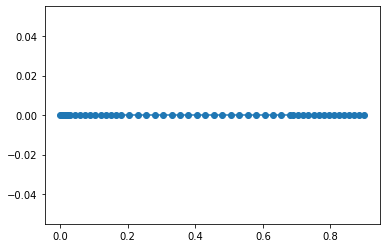

In [123]:

x0 = np.linspace(0,0.03,7)
x1 = np.linspace(0.03,0.18,11)
x2 = np.linspace(0.18,0.68,21)
x3 = np.linspace(0.69,0.9,15)
nx=[]
nx=np.append(nx,x0)
nx=np.append(nx,x1[1:])
nx=np.append(nx,x2[1:])
nx=np.append(nx,x3)
nx
plt.plot(nx,zeros(nx.shape),'o-')

In [124]:
nx

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.045, 0.06 ,
       0.075, 0.09 , 0.105, 0.12 , 0.135, 0.15 , 0.165, 0.18 , 0.205,
       0.23 , 0.255, 0.28 , 0.305, 0.33 , 0.355, 0.38 , 0.405, 0.43 ,
       0.455, 0.48 , 0.505, 0.53 , 0.555, 0.58 , 0.605, 0.63 , 0.655,
       0.68 , 0.69 , 0.705, 0.72 , 0.735, 0.75 , 0.765, 0.78 , 0.795,
       0.81 , 0.825, 0.84 , 0.855, 0.87 , 0.885, 0.9  ])

### 根据NACA翼型厚度获得宽度曲线

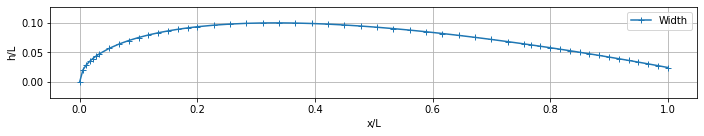

In [125]:
plt.figure(figsize=[10,2])
x,y=naca4(nx,20)
plt.plot(x/0.9,y,"+-",label="Width")
plt.grid()
plt.axis("equal")
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
bb=y

### 根据翼型获得高度曲线

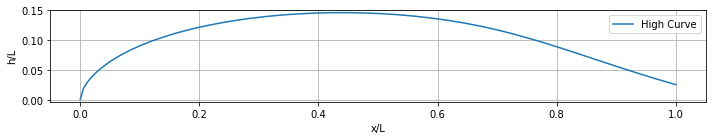

In [126]:
plt.figure(figsize=[10,2])
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
plt.plot(x/0.9,y,label="High Curve")
plt.axis("equal")
plt.grid()
plt.xlabel('x/L')
plt.ylabel('h/L')
plt.legend()
plt.tight_layout()
aa=y


In [127]:
## 根据B样条曲线确定nn参数  两组参数

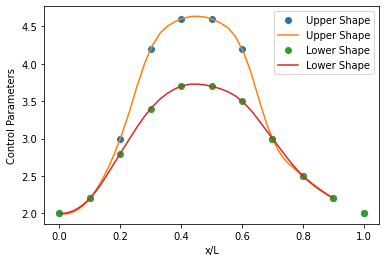

In [128]:
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x,y1,"o",nx,ny1,label="Upper Shape")
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
plt.plot(x,y2,"o",nx,ny2,label="Lower Shape")
plt.legend()
plt.xlabel("x/L")
plt.ylabel("Control Parameters")
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

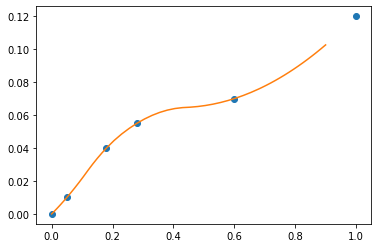

In [129]:
#自制Y曲线

x1=np.array([0, 0.05,  0.18, 0.28, 0.6,1])
y1=np.array([0, 0.01, 0.04, 0.055, 0.07,0.12])

from scipy.interpolate import splev, splrep
s1=splrep(x1,y1,k=2)
ny1=splev(nx,s1)
plt.plot(x1,y1,"o",nx,ny1)
delta = ny1

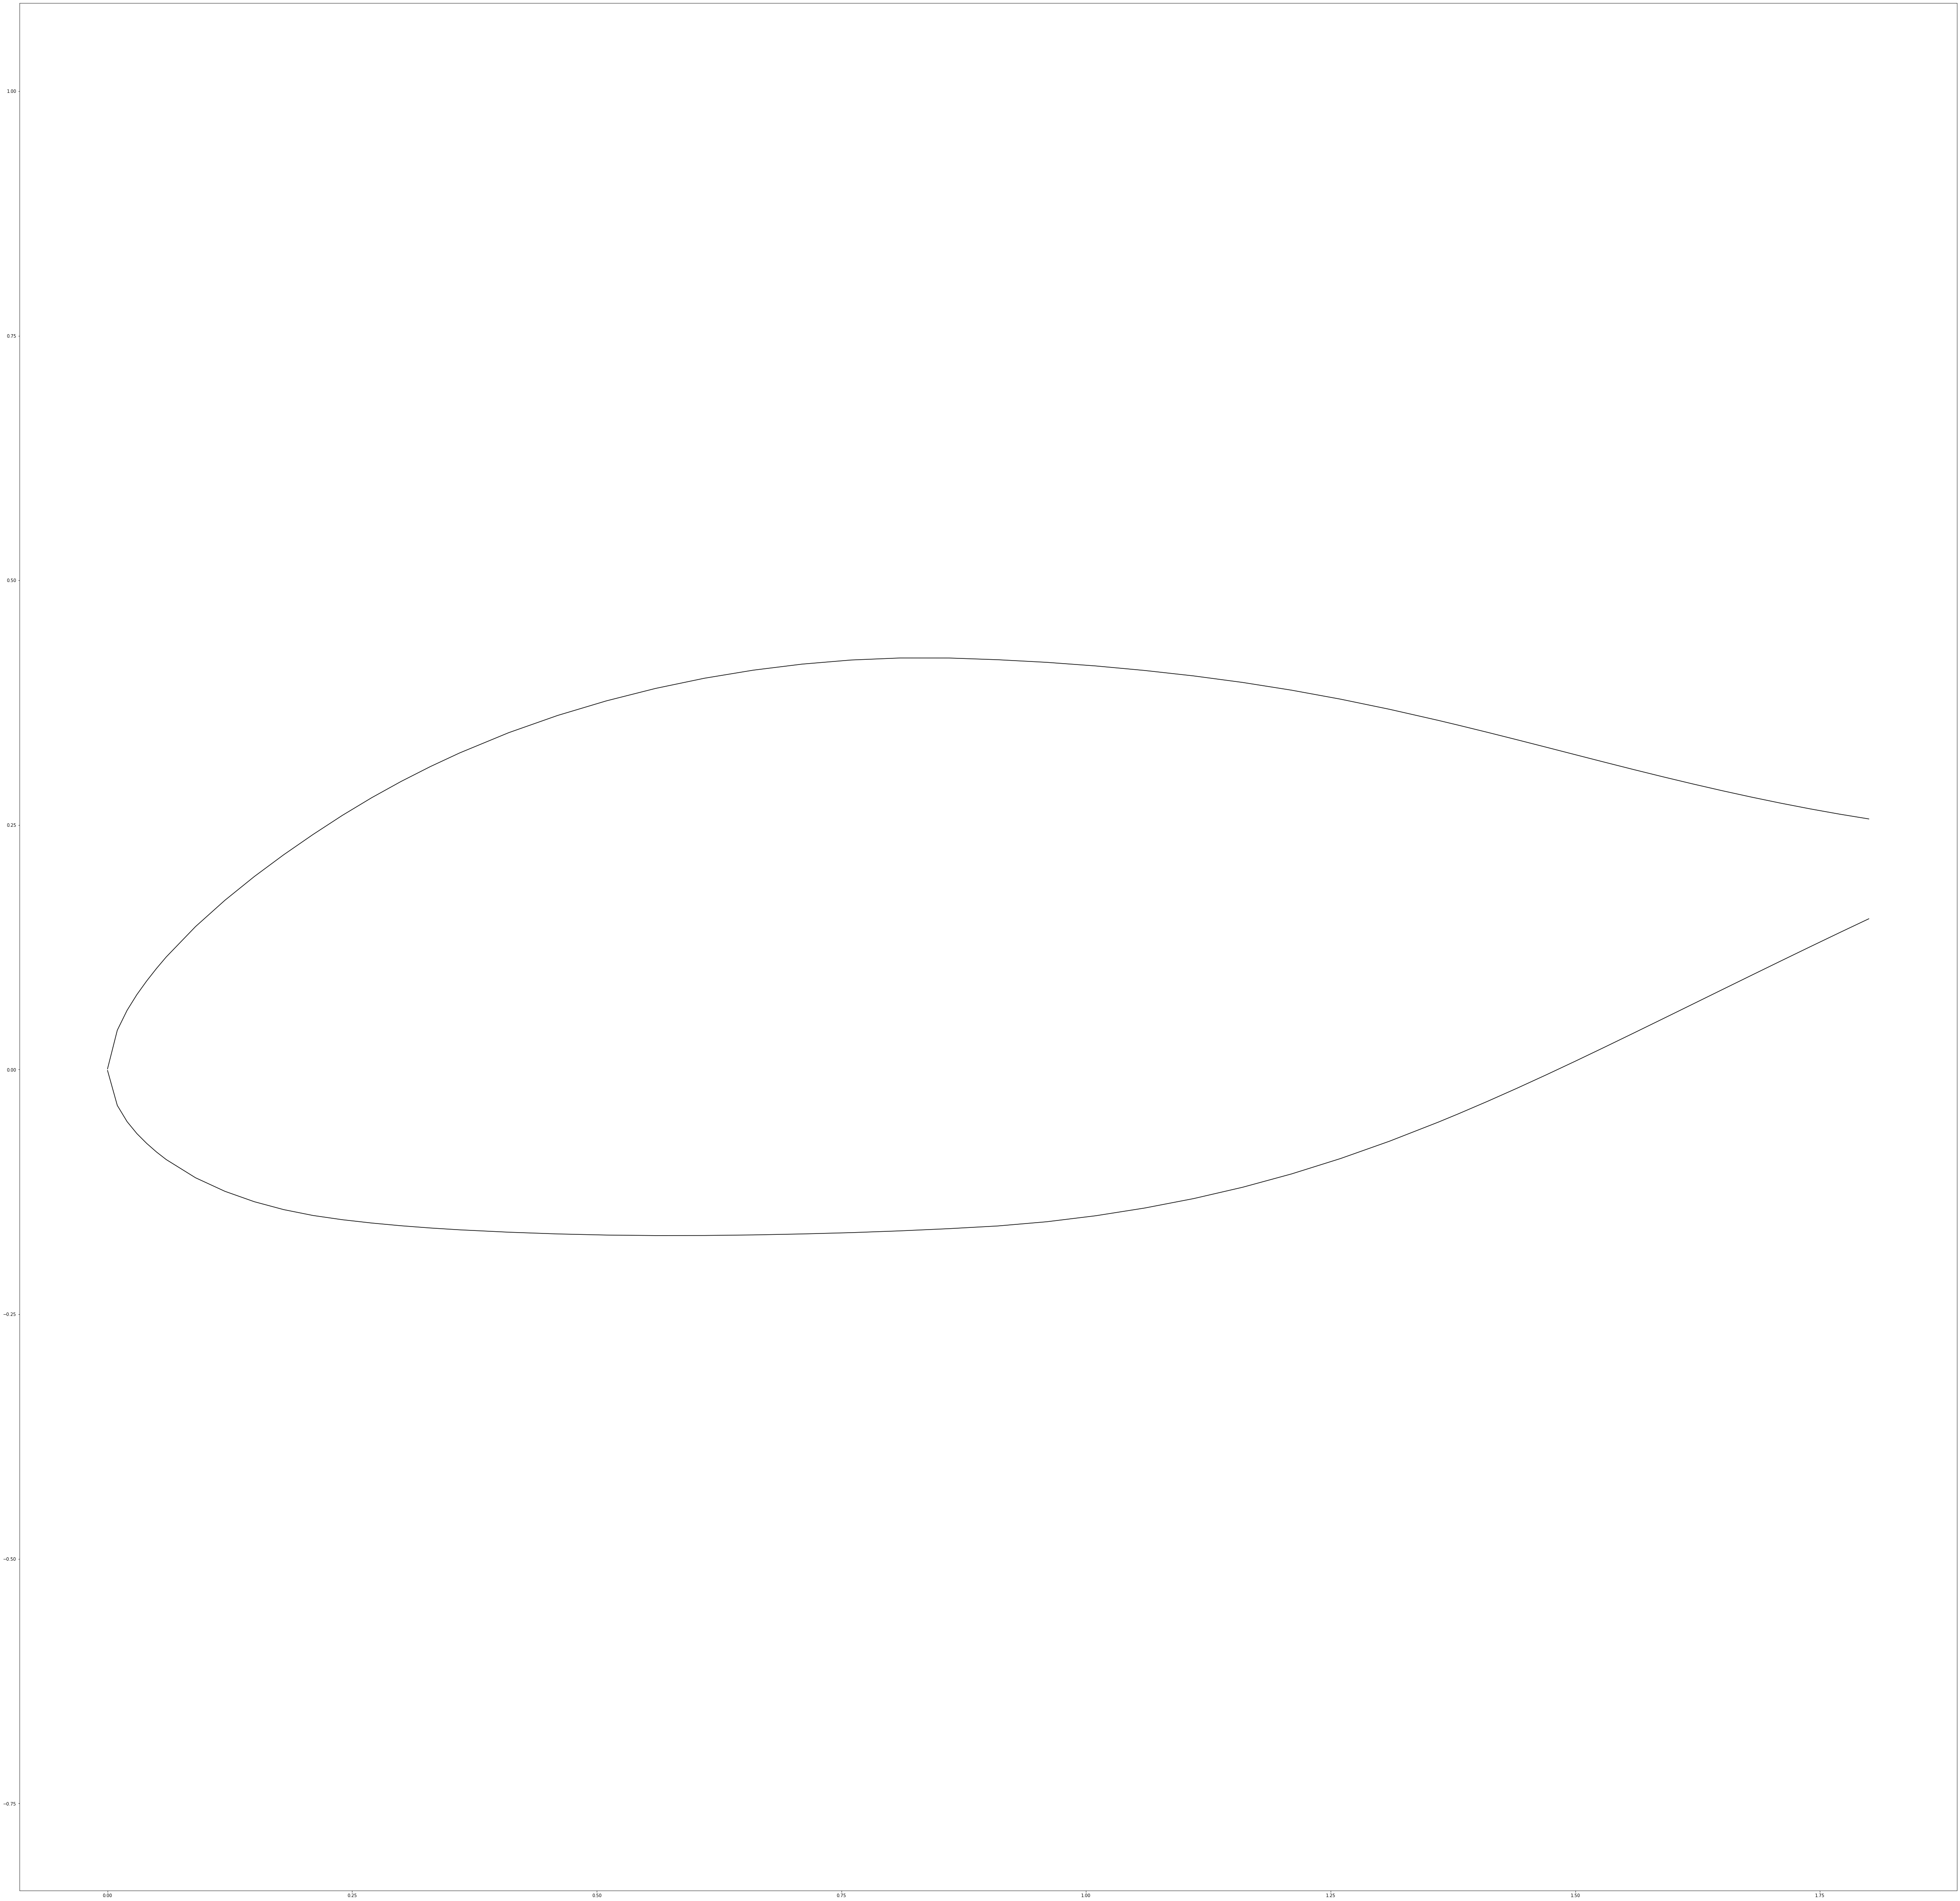

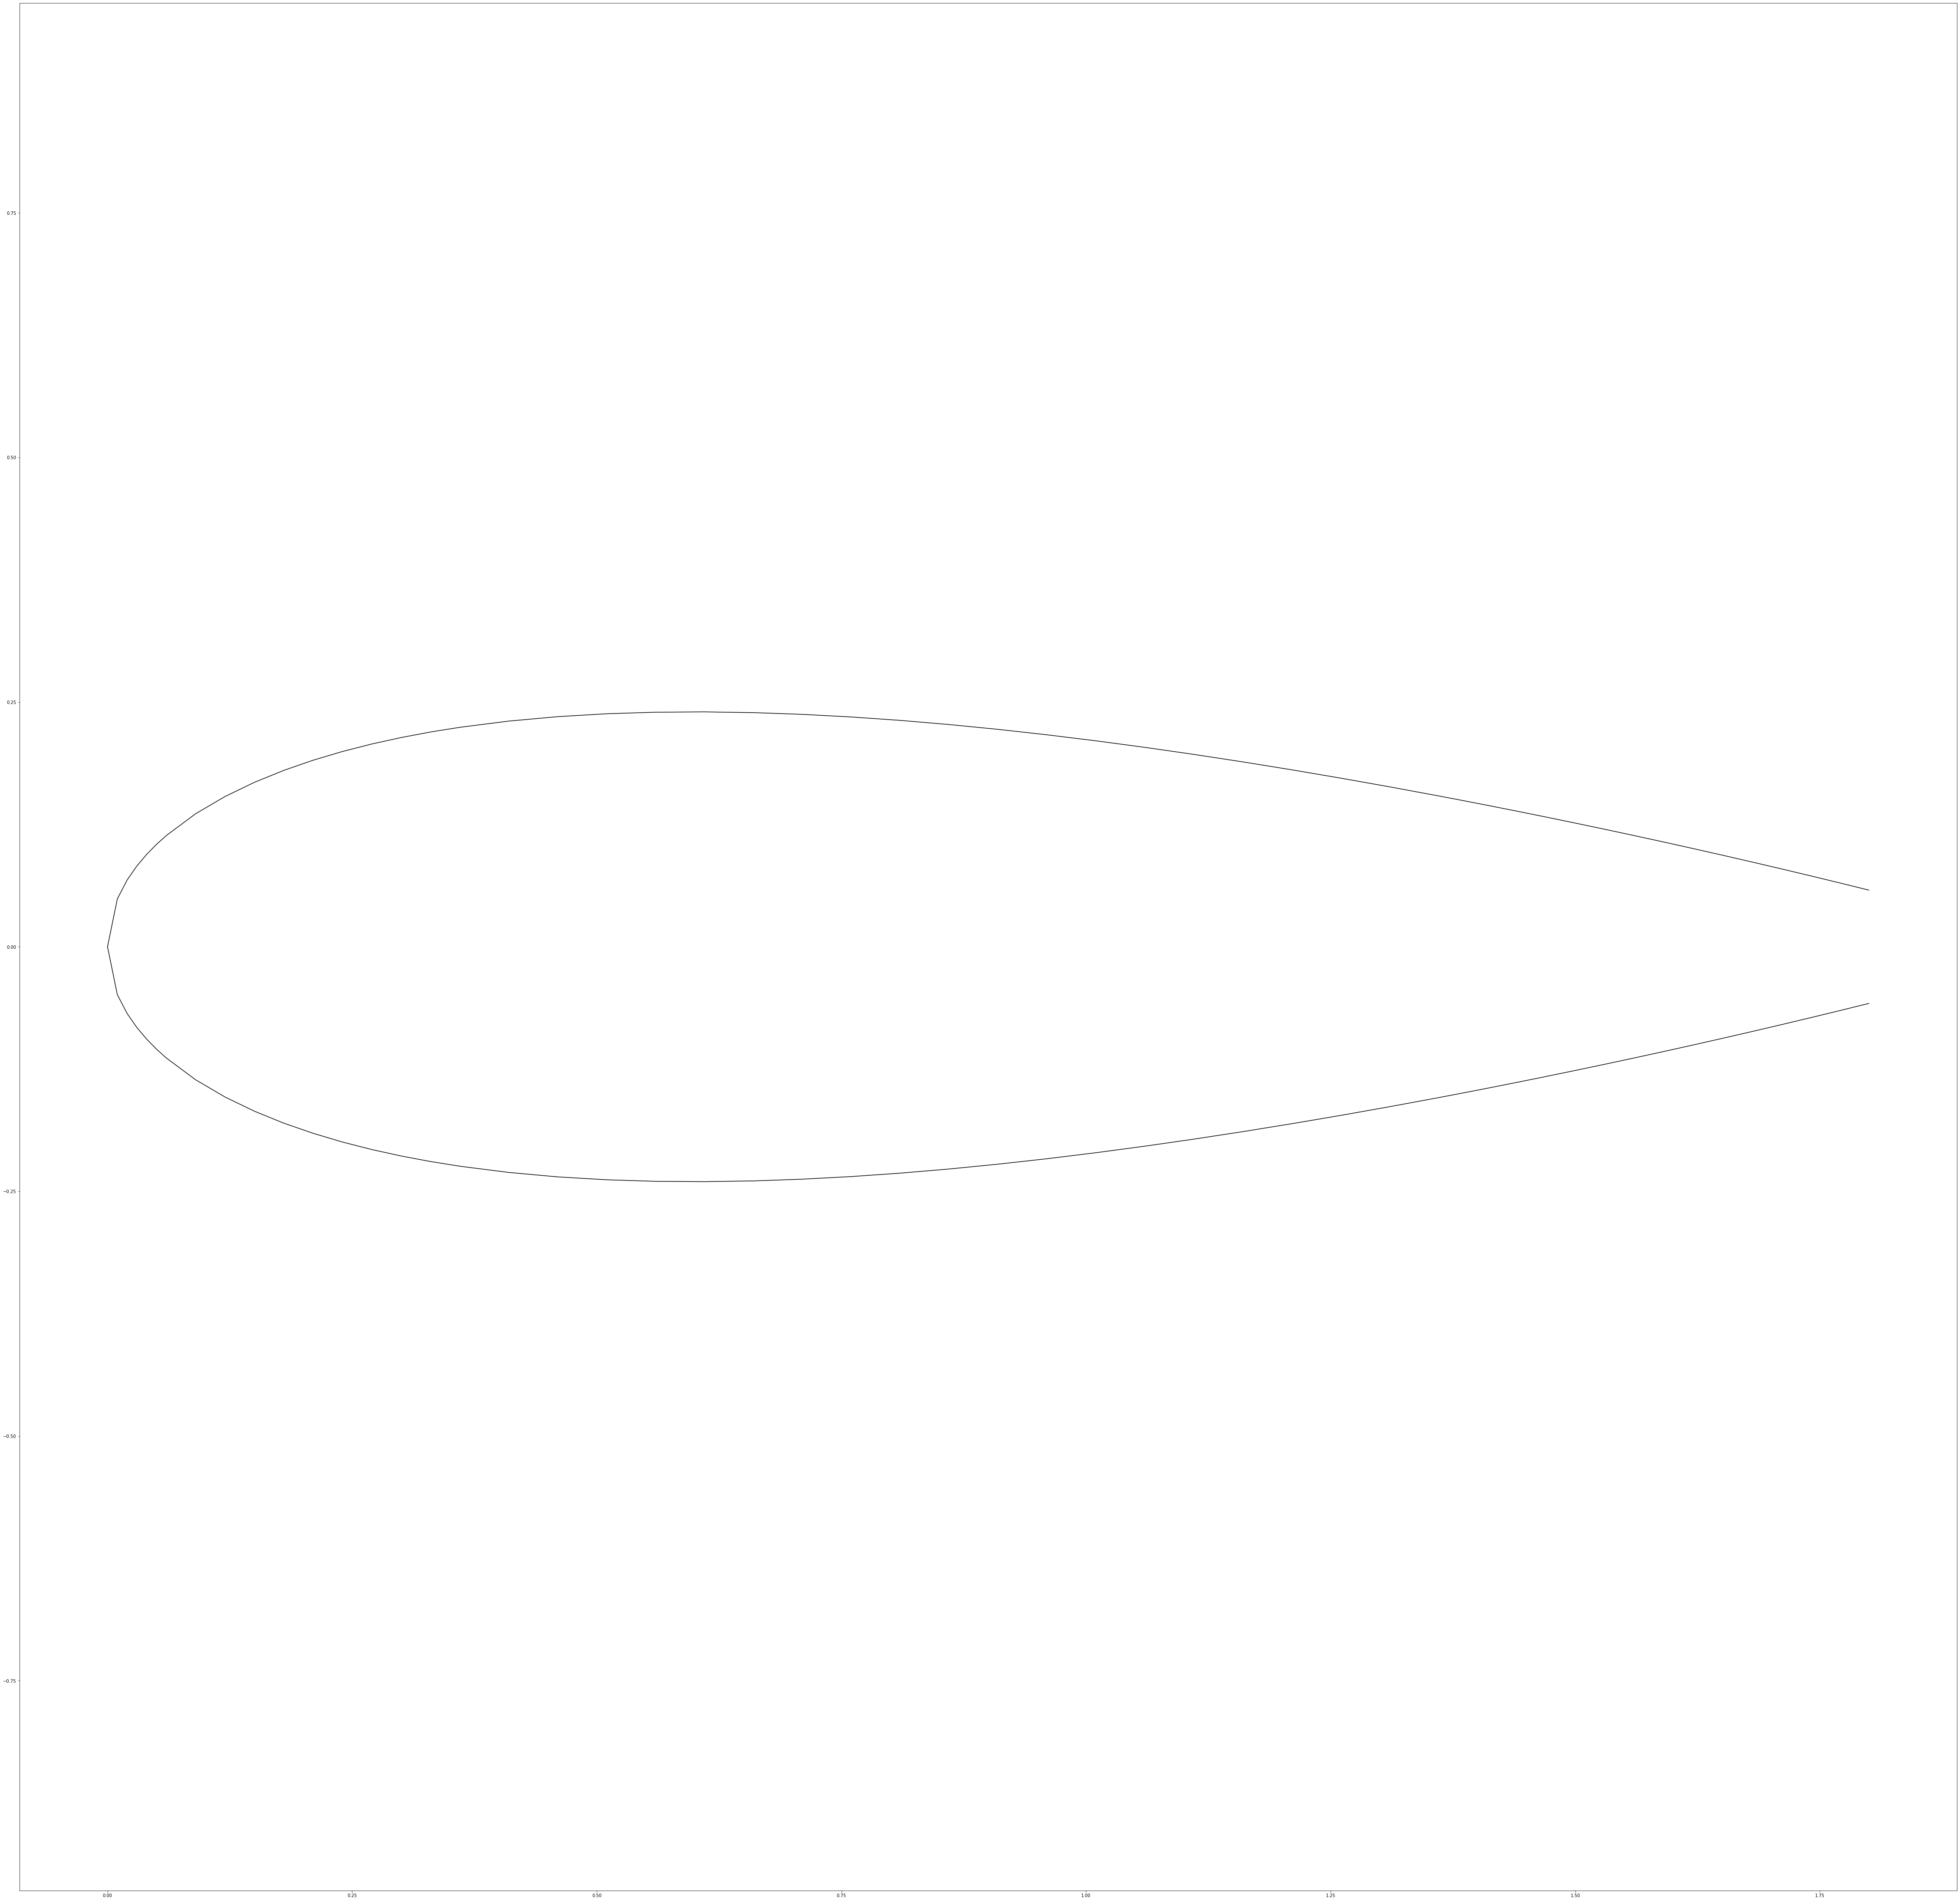

In [130]:
#显示测轮廓
of = open("E:\TestFuselageData-2.txt",'w')
psi = np.linspace(0,2*pi,81)
ymax=[]
ymin=[]
zmax=[]
zmin=[]
q=2
nx*=q
for idx, i in enumerate(nx):
    #print(nn4[idx])
    y,z=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    y+=delta[idx]
    y*=q
    z*=q
    ymax.append(y.max())
    ymin.append(y.min())
    zmax.append(z.max())
    zmin.append(z.min())
    plt.figure(figsize=(30,30))  #单位为英寸
    plt.plot(z,y,color='black')
    lables=['gao   = '  + str(ymax[idx]-ymin[idx])+'\n'+ 'kuan = ' + str(zmax[idx]-zmin[idx])]
    plt.legend(lables,fontsize='xx-large',loc= 'upper left')
    plt.axis("equal")
    plt.savefig('SVG2\%s.svg' % idx,format='svg')
    plt.close()
    for jdx, j in enumerate(z):
        of.write("%f %f %f\n"%(i,y[jdx],z[jdx]))
    of.write("\n")
of.close()
plt.figure(figsize=(80,80))
plt.plot(nx,ymax,color='black')
plt.plot(nx,ymin,color='black')
plt.axis("equal")
plt.savefig('Side-view2.svg',format='svg')
plt.figure(figsize=(80,80))
plt.plot(nx,zmax,color='black')
plt.plot(nx,zmin,color='black')
plt.axis("equal")
plt.savefig('Top-view2.svg',format='svg')



In [131]:
nx

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.09, 0.12, 0.15, 0.18,
       0.21, 0.24, 0.27, 0.3 , 0.33, 0.36, 0.41, 0.46, 0.51, 0.56, 0.61,
       0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96, 1.01, 1.06, 1.11, 1.16,
       1.21, 1.26, 1.31, 1.36, 1.38, 1.41, 1.44, 1.47, 1.5 , 1.53, 1.56,
       1.59, 1.62, 1.65, 1.68, 1.71, 1.74, 1.77, 1.8 ])

In [132]:
len(nx)

52